#### In reference from https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/

In [ ]:
Some of the important terms you need to know in NLP
    Tokenization – process of converting a text into tokens
    Tokens – words or entities present in the text
    Text object – a sentence or a phrase or a word or an article

In [1]:
import nltk

#### Text Preprocessing:
   The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing.
 steps involved in Text Preprocessing are shown below

In [5]:
import networkx as nx
from nxpd import draw

A="Noise Removal"
B="Lexicon Normalization"
C="Object Standardization"

G = nx.DiGraph()
G.graph['dpi'] = 100
G.add_node(A)
#G.add_nodes_from(range(1,9))
G.add_edges_from([(A,B),(B,C)])
draw(G, show='ipynb')

ModuleNotFoundError: No module named 'nxpd'

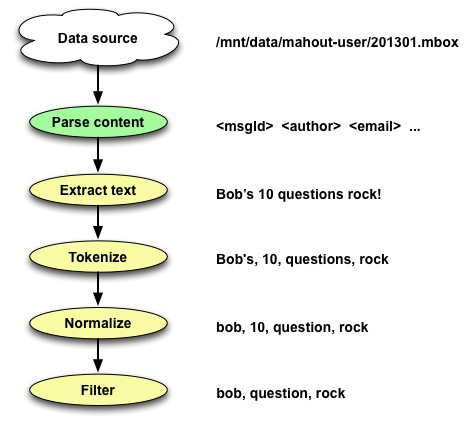

In [6]:
from IPython.display import Image
Image('Pipeline_nlp.jpg')

# Step 1(a) :Noise Removal (unwanted words)
 Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
 
 For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, social media entities (mentions, hashtags), punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.



## Approach:(Noisy Words)
Prepare Dictionary of nosiy entities and iterate text object by
tokens and eliminate those tokens present in the noise dictionary

In [9]:
#Sample Code:
noise_list = ["is", "a", "this", "..."]  #List of words you think is not appropriate


In [28]:
def _remove_noise(input_text):
    words = input_text.split()#split the given input at each space and keeps in List
    #print(type(words))
    noise_free_words = [word for word in words if word not in noise_list]
    #picks each word in the words list and check if it exists in the noise_List
    #or not.if not exist then keeps it in another list noise_free_words
    #print(type(noise_free_words))
    noise_free_text = " ".join(noise_free_words) 
    #appends all the words in the list of noise_free_words into string noise_list
    #_free_text as text is our final ouput of our cleaning
    #print(type(noise_free_text))
    return noise_free_text


In [29]:
_remove_noise("this is a sample text")
#you can see the ouput it removed the noisy words is ,a,this 

'sample text'

### Approach:(Remove the  Regex pattern #hashtag #twitter)
You can remove all the words starting with the regular expression.
This will be quite helpful while you working with the social media data

In [44]:
import re # imports the regular expression

def _remove_regex(input_text, regex_pattern):#Takes the inputs as input text and regex pattern 
    urls = re.finditer(regex_pattern, input_text)
    #code starts here----the below 4 lines of code until for loop is to just show where
    #all the re.finditer finding match in the input text
    pattern = re.compile(regex_pattern, re.UNICODE)
    print(type(urls))
    for match in pattern.finditer(input_text):
        print(match)
    #code ends here----
    for i in urls:
        #it iterates over all the finding then removes the text with that pattern #
        input_text = re.sub(i.group().strip(), '', input_text)
    return input_text

regex_pattern = "#[\w]*"  

In [46]:
_remove_regex("remove this #hashtag from analytics #twitter feed", regex_pattern)

<class 'callable_iterator'>
<_sre.SRE_Match object; span=(12, 20), match='#hashtag'>
<_sre.SRE_Match object; span=(36, 44), match='#twitter'>


'remove this  from analytics  feed'

## Step 1(b) : Lexicon Normalization (replacing the same word)
Eg:  “play”, “player”, “played”, “plays” and “playing” --->Play

Eg: multiplying --> Multiply

This step converts all the disparities of a word into their normalized form(also known as lemma). 

Normalization is a pivotal step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature), which is an ideal ask for any ML model.

### Common Practices of Lexicon Normalization:
Stemming:  Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

Lemmatization: Lemmatisation (or lemmatization) in linguistics, is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.

Lemmatization, on the other hand, is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) 
and morphological analysis (word structure and grammar relations).

In [53]:
#Before ypu want to run this Lexicon Normalization.You need to download the 
#word set from the NTLK where it consisit of all the root words to compare
#the word

# Command to download wordnet 
#sudo python -m nltk.downloader -d /Users/urname/nltk_data wordnet

from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
#I

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()


word = "playing" 
print(lem.lemmatize(word, "v"))
print(stem.stem(word))

play
play


### Step 1(c) : Object Standartization
This is nothing but replacing the shortcut words with the orginal word.

Eg: "awsm" : "awesome"
    ,"luv" :"love"

In [57]:
lookup_dict ={'rt':'Retweet', 'dm':'direct message', "awsm" : "awesome", "luv" :"love"}
def _lookup_words(input_text):
    # works similar  to our previous 1(a)
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word)
        new_text = " ".join(new_words) 
        return new_text

In [58]:
_lookup_words("RT this is a retweeted tweet by Shivam Bansal")

'Retweet'

# Step 2: Text to Features (Feature Engineering on text data)


#### To analyse a preprocessed data, it needs to be converted into features. 
Depending upon the usage, text features can be constructed using assorted techniques –
    
    Syntactical Parsing
    Entities
    N-grams
    word-based features
    Statistical features
    word embeddings

## Step 2.1:  Syntactic Parsing
    

### What is syntactic parsing?
    – Identifying syntactic structure underlying a sentence.
    – Assumes that there is a set of rules that underlie language

### Why is it useful?
    – Serves as a model that explains the observed language string.
    – Use it to:
        • Predict or complete sentences.
        • Re-organize, simplify sentences.
        • Learn semantic phenomenon identifiable via syntactic patterns. 

### What are the big issues in syntactic parsing?
    – Dependence on semantics
    – Lexicalization helps but hurts generalization.
    – Speed. Parsing is a O(N3) business w/ a constant the size of   grammar.

## Step 2.1(a) : Part of Speech Tagging
 Part of speech tagging
 
Apart from the grammar relations, every word in a sentence is also associated with a part of speech (pos) tag (nouns, verbs, adjectives, adverbs etc). The pos tags defines the usage and function of a word in the sentence.

In [63]:
#to run this you need to install ntlk pacakges in u r terminal
#sudo python -m nltk.downloader -d /Users/urname/nltk_data punkt
#sudo python -m nltk.downloader -d /Users/urname/nltk_data averaged_perceptron_tagger
from nltk import word_tokenize, pos_tag
text = "I am learning Natural Language Processing on Analytics Vidhya"
tokens = word_tokenize(text)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('on', 'IN'), ('Analytics', 'NNP'), ('Vidhya', 'NNP')]


### Some of things available in the Parts of Speech Tagging:
    Word sense disambiguation.
    Improving word-based features
    Normalization and Lemmatization
    Efficient stopword removal
    
    
        

## Step 2.2: Entity Extraction:
        Entities are defined as the most important chunks of a sentence – noun phrases, verb phrases or both. Entity Detection algorithms are generally ensemble models of rule based parsing, dictionary lookups, pos tagging and dependency parsing. The applicability of entity detection can be seen in the automated chat bots, content analyzers and consumer insights.

### Methods of Entity Extraction:
    1.Named Entity Recognition(NER)
        Noun Phrase Identification.
        Phrase Classification.
        Entity Disambiguation.
    2.Topic Modelling

### 2.2.1: Named Entity Recognition (NER)
The process of detecting the named entities such as person names, location names, company names etc from the text is called as NER

Eg:Sentence – Sergey Brin, the manager of Google Inc. is walking in the streets of New York.

Named Entities –  ( “person” : “Sergey Brin” ), (“org” : “Google Inc.”), (“location” : “New York”)



#### 2.1.1(a):Noun phrase identification: 
This step deals with extracting all the noun phrases from a text using dependency parsing and part of speech tagging.

#### 2.1.1(b):Phrase classification:
This is the classification step in which all the extracted noun phrases are classified into respective categories (locations, names etc). Google Maps API provides a good path to disambiguate locations, Then, the open databases from dbpedia, wikipedia can be used to identify person names or company names. Apart from this, one can curate the lookup tables and dictionaries by combining information from different sources.

#### 2.1.1(c):Entity disambiguation:
Sometimes it is possible that entities are misclassified, hence creating a validation layer on top of the results is useful. Use of knowledge graphs can be exploited for this purposes. The popular knowledge graphs are – Google Knowledge Graph, IBM Watson and Wikipedia. 

### 2.2.2 :Topic Modeling

Topic modeling is a process of automatically identifying the topics present in a text corpus, it derives the hidden patterns among the words in the corpus in an unsupervised manner. Topics are defined as “a repeating pattern of co-occurring terms in a corpus”. 

Eg:A good topic model results in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, 

and “farm”, “crops”, “wheat” for a topic – “Farming”.

In [65]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father." 
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc_complete = [doc1, doc2, doc3]
doc_clean = [doc.split() for doc in doc_complete]



In [71]:
import gensim 
import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index.  
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. 
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

# Results 
print(ldamodel.print_topics())

ModuleNotFoundError: No module named 'corpus'

## Step 2.3: N-Grams as Features

A combination of N words together are called N-Grams. N grams (N > 1) are generally more informative as compared to words (Unigrams) as features. Also, bigrams (N = 2) are considered as the most important features of all the others. The following code generates bigram of a text.



In [72]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

generate_ngrams('this is a sample text', 2)

[['this', 'is'], ['is', 'a'], ['a', 'sample'], ['sample', 'text']]

## Step 2.3 : Statistical Features

##### Text data can also be quantified directly into numbers using several techniques described in this section:

### A.  Term Frequency – Inverse Document Frequency (TF – IDF)

TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”

Inverse Document Frequency (IDF) – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.

TF . IDF – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ["This is very strange",
          "This is very nice"]
vectorizer = TfidfVectorizer(
                        use_idf=True, # utiliza o idf como peso, fazendo tf*idf
                        norm=None, # normaliza os vetores
                        smooth_idf=False, #soma 1 ao N e ao ni => idf = ln(N+1 / ni+1)
                        sublinear_tf=False, #tf = 1+ln(tf)
                        binary=False,
                        min_df=1, max_df=1.0, max_features=None,
                        strip_accents='unicode', # retira os acentos
                        ngram_range=(1,1), preprocessor=None,              stop_words=None, tokenizer=None, vocabulary=None
             )
X = vectorizer.fit_transform(corpus)
idf = vectorizer.idf_
print(dict(zip(vectorizer.get_feature_names(), idf)))

{'is': 1.0, 'nice': 1.6931471805599454, 'strange': 1.6931471805599454, 'this': 1.0, 'very': 1.0}


#### Two things are happening that you might not expect in the sklearn implimentation:

The TfidfTransformer has smooth_idf=True as a default param

It always adds 1 to the weight

### B. Count / Density / Readability Features

    Count or Density based features can also be used in models and analysis. 
    These features might seem trivial but shows a great impact in learning models. 
    Some of the features are: Word Count, Sentence Count, Punctuation Counts and Industry specific word counts. 
    Other types of measures include readability measures such as syllable counts, smog index and flesch reading ease. 
    Refer to Textstat library to create such features.